# Introdoction
It is common to use a helical conformation as the initial conformation of a polymer chain in Molecular Dynamics (MD) simulation. In this far-from-equilibrium configuration, the monomers are positioned on a cylindrical helix with this parametric eqations in three-dimentional Cartesian coordinate system (https://www.encyclopediaofmath.org/index.php/Helical_line):
\begin{align}
z &= c_{h} t=\frac{p_h}{2\pi}t,\\
x &= \frac{D_h}{2}\cos{t},\\
y &= \frac{D_h}{2}\sin{t}.
\end{align}
Where $t$ is the arc length of the helix, $c_{h}$ is a real postive parameter by which $p_h=2\pi c_{h}$ gives the fixed separation distance between turns, i. e. pitch, and $D_h$ is the cylinder diameter (We used diameter of cylinder $D_h$ instead of its radius $R_h$ because $D_h$ can be connected to the size of cylinderical confinement $D$). Since we want to place some monomers on the helix so $c_{sep}\le a_{max}$, where $a_{max}$ is the size of the largest monomer in each turn - We implicitly assume that the chain can be heterogeneous. Moreover, instead of $t$, we use $z$ as the main parameter, so we have $t=\frac{2\pi z}{p_h}$ and 
\begin{align}
x &= \frac{D_h}{2}\cos{\frac{2\pi z}{p_h}},\\
y &= \frac{D_h}{2}\sin{\frac{2\pi z}{p_h}}.
\end{align}
## How to insert monomers on a helix, following physical rules?
We use the Finite Extensible Nonlinear Elastic (FENE) potential (the first term below) and the Weeks-Chandler-Anderson (WCA) potential (the second term below; a shifted-truncated Lennnard-Jones (LJ) potential) to bond some monomers together and create a self-avoiding chain:
\begin{equation}
U_{mm}(r_{ij})=U_{FENE}(r_{ij})+U_{WCA}(r_{ij})=-\frac{1}{2}k_{ij}b_{ij}^2\ln\Big[1-\big(\frac{r_{ij}}{b_{ij}}\big)^2\Big]+4\epsilon_{ij}\Big[\big(\frac{\sigma_{ij}}{r_{ij}}\big)^{12}-\big(\frac{\sigma_{ij}}{r_{ij}}\big)^{6}+\frac{1}{4}\Big]
\end{equation}
where $k_{ij}$ is the spring constant, $b_{ij}$ is the lenght of bond, $\epsilon_{ij}$ is the depth of atteractive well,  $\sigma_{ij}$ is the interparticle distance where the WCA potential change sign, and $r_{ij}$ is the center-to-center distance between  monomers $i$ and $j$. It is common to set $\sigma_{ij}=\frac{a_i+a_j}{2}\sigma$ where $\sigma=a$ is the size of the reference monomer size in the system, and  $a_i$ and $a_j$ are the sizes of monomers $i$ and $j$, respectively; however, it is also common to $\sigma_{ij}=\epsilon_0=1$. For the FENE potential, we have $b_{ij}=\frac{\sigma}{\sigma_{ij}}b_0$ where $b_0=1.5\sigma$ is the FENE standard bond length, and $k_{ij}=(\frac{\sigma_{ij}}{\sigma})^2k_0$ (this choice means the bond energy is the same for all the pair, irrespective of their bond length differences) where $k_0=\frac{30.0\epsilon}{\sigma^2}$. 

In the PizzaPy package (chain.py), $r_{exc}$ (*exc* stand for excluded. The name is *dmin* in the package) is the minimum distance between a monomer and the monomer two before it, so it determined the stiffness of the chain, but how? Suppose we put a monomer $i$ of size $\sigma_{ij}$ randomly in the simulation box, and then place the center of the next monomer $j$ randomly on the surfacye of a sphere of the radius equal to $b_{ij}$. Where we can place the third monomer? Agian, the center of the third monomer $k$  can be on the surface of of a sphere of the radius equal to $b_{jk}$; however, the center of the monomer $k$ cannot in  the sphere of $r^{(exc)}_{ij}=\sigma_{ik}$ due to the excluded-volume interaction (exc stand for excluded). This parameter $r^{(exc)}_{ij}$ had a nice meaning; it can set the stiffness of a chain: A larger $r^{(exc)}_{ij}$ means that the third monomer has a lower freedom in space, so the bind $b_{ik}$ is probabilily more aligned with $b_{ij}$.

For a homogeneous chain of monomers with size $a=1.0$, PizzaPy package set $b_{init}=0.97<b_0=1.5$ and $r^{(exc)}=1.02\simeq\sigma=1.0$. This means the monomers composing a chain are comporessed along the backbone and the chain is fully flexible. In a stark difference with the PizzaPy's approach of creating a chain with an initial random conformation, we use an ordered helical conformation as the initial conformation of the chain, as expalined below.
### Equally-spaced monomers on a (cyliderical) helix
Let's first investigate a homogeneous chain of monomers with size $a$. If we set $p_h=\gamma_{pitch}a$ and $D_h=\alpha D_{polymer}=\alpha(D_{real}-a)=\alpha(D_{cyl}-2a)$, where $D_{cyl}=\beta_{cyl}a$ is the center-to-center distance of wall-forming beads in Lammps, $D_{real}$ is the surface-to-surface distance of wall-forming beads in which you can have monomers, and $D_{polymer}$ is the minimum diameter of cylinder in which you can have a polymer (For $D_{cyl}=2a$, you can have a linear rode of monomers, not a polymer).

I set the minimum distance between two monomers along the helix $s_{init}=D_h\arcsin[\frac{b_{init}}{D_{helix}}]$ with $b_{init}=0.97\sigma=0.97a$ (*As seen below, To have center to center distance smaller then sigma_ij, we need to change 0.97 to something smaller -- the choice of PizzaPy does not work for our helical conformation*), so I then change the prefactor from 0.97 to 0.95 (I run many simulations with the prefactor 0.95 and get the error *FENE bond too large*, **the reason is probably that crowders does not allow the chani reach its equilibrium size during the equilibration**). The phase of each monomer is given by the value of its z-component. The diameter of the helix $D_h=0.4D_{cyl}$ so $\alpha=0.4$. Using this infromation, the positions of the monomers is given by 
\begin{align}
z_i &= \frac{i}{N}L_h ,\\
x_i &= \frac{D_h}{2}\cos{2\pi z_i},\\
y_i &= \frac{D_h}{2}\sin{2\pi z_i}.
\end{align}
The lenght of the helix $L_h$ and that of cylinder $L$ are set in the following way
\begin{align}
L_{turn} &=\text{the length of one turn}= \sqrt{(\frac{2\pi D_h}{2})^2+p_h^2}=\sqrt{(\pi\alpha\beta_{cyl}a)^2+p_h^2}=\sqrt{(\pi\alpha\beta_{cyl}a)^2+(\gamma_{pitch}a)^2}=a\sqrt{(\pi\alpha\beta_{cyl})^2+\gamma^2_{pitch}},\\
N_{turn}&= \text{# of monomer in each turn} = [\frac{L_{turn}}{a}],\\
L_{contour}&=\text{the contour length of the polymer}= Na,\\
N_h &=\text{# of the helix turns}=[\frac{L_{contour}}{L_{turn}}]+1,\\
L_h &= N_ha,\\
L &= L_h+ 2a.
\end{align}

If we compare the length of the helix along the helical axis with the lenght of a linear polymer confined in a cylinder, we have
\begin{align}
\frac{L_{helix}}{L_{1D}} &= \frac{N_tha}{1.27Na(\frac{D_{real}}{a})^{-2/3}}\\
&=\frac{\frac{N}{N_{turn}}a}{1.27Na(\frac{D_{real}}{a})^{-2/3}}\\
&=\frac{1}{1.27N_{turn}}(\frac{D_{cyl}a1}{a})^{2/3}\\
&=\frac{(\beta_{cyl}-1)^{2/3}}{1.27\sqrt{(\pi\alpha\beta_{cyl})^2+\gamma^2_{pitch}}}
\end{align}
If compared with the free space, we have
\begin{align}
\frac{L_{helix}}{L_{3D}} &= \frac{N_tha}{1.1N^{3/5}a}\\
&=\frac{\frac{N}{N_{turn}}a}{1.1N^{3/5}a}\\
&=\frac{N^{2/5}}{1.1N_{turn}}\\
&=\frac{N^{2/5}}{1.1\sqrt{(\pi\alpha\beta_{cyl})^2+\gamma^2_{pitch}}}
\end{align}
Above we have $\alpha=0.5$ and $\gamma_{pitch}=1$.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
from scipy.spatial.transform import Rotation as R
import datetime
%matplotlib inline

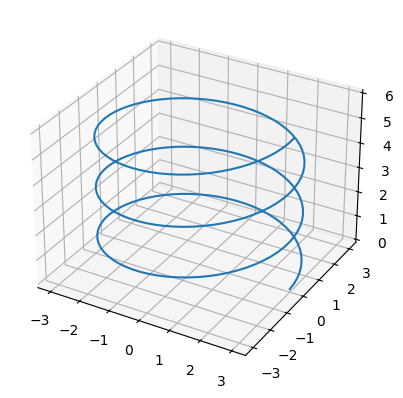

In [2]:
# simple closed helix
# Set the helix parameters
r = 3  # radius of the helix
h = 2  # height of one complete turn
n_turns = 3  # number of turns in the helix
n_points = 200  # number of points to plot

# Create an array of angles from 0 to n_turns * 2 * pi
theta = np.linspace(0, n_turns * 2 * np.pi, n_points)

# Calculate the x, y, and z coordinates of the helix
x = r * np.cos(theta)
y = r * np.sin(theta)
z = h * (theta / (2 * np.pi))

# Close the helix by connecting the first and last points
#x = np.append(x, x[0])
#y = np.append(y, y[0])
#z = np.append(z, z[0])

# Plot the helix
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
plt.show()


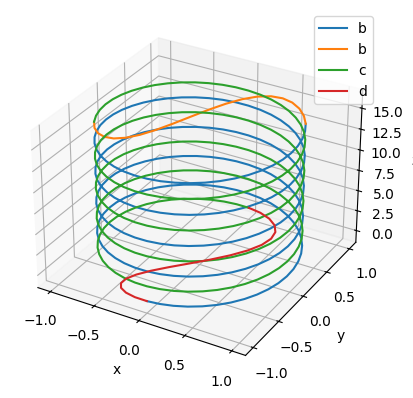

In [3]:
# plectoneme with a fixed radius=1
# references: 2008 - Neukirch S  Starostin EL - Writhe formulas and antipodal points in plectonemic DNA configurations
# a circularly closed supercoiled helix
h_radius =  1 # helix radius
h_zgap = 3* np.sqrt(3)/3 # a positive parameter
h_ptich = 2 * np.pi * h_zgap # pitch of the helix; pitch=2*pi*p
t_alength = 2 * np.pi * np.sqrt(h_radius**2+h_zgap**2)# arclength of one turn
h_theta = np.arctan(h_zgap/h_radius) # helix angle: 0 <= h_theta < pi/2
h_slope = 1/np.tan(h_theta) # helix slope

# helix A: A right-handed helix
a_turns = 2.5 # number of turns in the helix 
a_clength = a_turns * t_alength # helix contour length
a_theta = h_theta  # 0 <= h_theta < pi/2
a_points = 200 # number of points to plot
a_delta_psi = a_clength * np.sin(a_theta)

# Create an array of arclengths from 0 to the helix contour length
a_s = np.linspace(0, a_clength, a_points) # arclength
a_psi = a_s * np.sin(a_theta)
# Calculate the x, y, and z coordinates of the helix A:
a_x = h_radius * np.sin(a_psi)
a_y = h_radius * -1 * np.cos(a_psi)
#a_z = a_s*np.cos(a_theta)
a_z = a_s*np.cos(a_theta)

# End semi-circle (loop) B
b_clength = h_radius * np.pi
b_points = 20
b_s = np.linspace(0, b_clength, b_points) # arclength
b_theta = a_theta - b_s*(1+2*a_theta/np.pi)
# Calculate the x, y, and z coordinates of the end semi-circle (loop) B:
b_x = h_radius * (np.sin(a_delta_psi)*np.cos(b_s) + np.cos(a_delta_psi)*np.sin(a_theta)*np.sin(b_s)*np.cos(b_s))
b_y = h_radius * (-1 * np.cos(a_delta_psi)*np.cos(b_s) + np.sin(a_delta_psi)*np.sin(a_theta)*np.sin(b_s)*np.cos(b_s))
b_z = a_clength * np.cos(a_theta) + (np.sin(a_theta)-np.sin(b_theta))/(1+(2*a_theta)/np.pi)

# helix C: A right-handed helix
c_turns = 2.5 # number of turns in the helix 
c_clength = a_clength # helix contour length
c_theta = -1*np.pi-a_theta
c_points = a_points # number of points to plot
# Create an array of arclengths from 0 to the helix contour length
c_s = np.linspace(0, c_clength, c_points) # arclength
c_psi = a_delta_psi - c_s*np.sin(c_theta)

# Calculate the x, y, and z coordinates of the helix A:
c_x = -1 * h_radius * np.sin(c_psi)
c_y = h_radius * np.cos(c_psi)
c_z = a_clength*np.cos(a_theta) + c_s*np.cos(c_theta)

# End semi-circle (loop) C
d_clength = b_clength
d_points = b_points
d_s = np.linspace(0, d_clength, d_points) # arclength
d_theta = -1*np.pi - a_theta + d_s*(1+2*a_theta/np.pi)
# Calculate the x, y, and z coordinates of the end semi-circle (loop) D:
d_x = h_radius * np.sin(a_theta)*np.sin(d_s)*np.cos(d_s)
d_y = h_radius * np.cos(d_s) 
d_z = (np.sin(d_theta)-np.sin(a_theta))/(1+(2*a_theta)/np.pi)



# Plot the helix
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot(a_x, a_y, a_z, label='b')
ax.plot(b_x, b_y, b_z, label='b')
ax.plot(c_x, c_y, c_z, label='c')
ax.plot(d_x, d_y, d_z, label='d')
ax.legend()
plt.show()

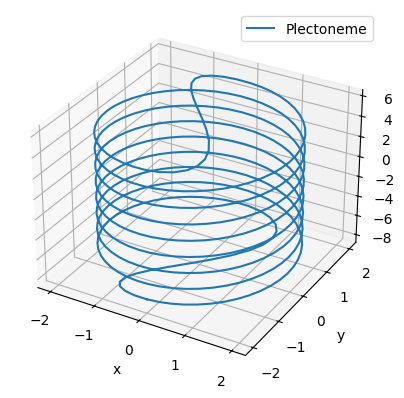

In [4]:
# plectoneme with any radius and pitch, modified version of the following article
# references: 2008 - Neukirch S  Starostin EL - Writhe formulas and antipodal points in plectonemic DNA configurations
# a circularly closed supercoiled helix

h_radius =  2 # helix radius
h_zgap = 1 #np.sqrt(3)/3 # a positive parameter
h_ptich = 2 * np.pi * h_zgap # pitch of the helix; pitch=2*pi*p
t_super_radius = np.sqrt(h_radius**2+h_zgap**2)
t_alength = 2 * np.pi * np.sqrt(h_radius**2+h_zgap**2)# arclength of one turn
h_theta = np.arccos(h_zgap/t_super_radius) # helix angle: 0 <= h_theta < pi/2
h_slope = 1/np.tan(h_theta) # helix slope

# helix A: A right-handed helix
a_turns = 2 # number of turns in the helix 
a_clength = a_turns * t_alength # helix contour length
a_theta = h_theta  # 0 <= h_theta < pi/2
a_points = 200 # number of points to plot
a_delta_psi = a_clength * h_radius / t_super_radius # np.sin(a_theta)

# Create an array of arclengths from 0 to the helix contour length
a_s = np.linspace(0, a_clength, a_points) # arclength
a_psi = a_s * h_radius / t_super_radius #np.sin(a_theta)
# Calculate the x, y, and z coordinates of the helix A:
a_x = h_radius * np.sin(a_psi)
a_y = h_radius * -1 * np.cos(a_psi)
#a_z = a_s*np.cos(a_theta)
a_z = a_s*np.cos(a_theta)

# End semi-circle (loop) B
b_clength = h_radius * np.pi
b_points = 20
b_s = np.linspace(0, np.pi, b_points) # arclength
b_theta = a_theta - b_s*(1+2*a_theta/np.pi)
# Calculate the x, y, and z coordinates of the end semi-circle (loop) B:
b_x = h_radius * (np.sin(a_delta_psi)*np.cos(b_s) + np.cos(a_delta_psi)*np.sin(a_theta)*np.sin(b_s)*np.cos(b_s))
b_y = h_radius * (-1 * np.cos(a_delta_psi)*np.cos(b_s) + np.sin(a_delta_psi)*np.sin(a_theta)*np.sin(b_s)*np.cos(b_s))
b_z = a_clength * np.cos(a_theta) + (np.sin(a_theta)-np.sin(b_theta))/(1+(2*a_theta)/np.pi)

# helix C: A right-handed helix
c_turns = a_turns # number of turns in the helix 
c_clength = a_clength # helix contour length
c_theta = -1*np.pi-a_theta
c_points = a_points # number of points to plot
# Create an array of arclengths from 0 to the helix contour length
c_s = np.linspace(0, c_clength, c_points) # arclength
c_psi = a_delta_psi - c_s*np.sin(c_theta)

# Calculate the x, y, and z coordinates of the helix A:
c_x = -1 * h_radius * np.sin(c_psi)
c_y = h_radius * np.cos(c_psi)
c_z = a_clength*np.cos(a_theta) + c_s*np.cos(c_theta)

# End semi-circle (loop) C
d_clength = b_clength
d_points = b_points
d_s = np.linspace(0, np.pi, d_points) # arclength
d_theta = -1*np.pi - a_theta + d_s*(1+(2*a_theta)/np.pi)
# Calculate the x, y, and z coordinates of the end semi-circle (loop) D:
d_x = h_radius * np.sin(a_theta)*np.sin(d_s)*np.cos(d_s)
d_y = h_radius * np.cos(d_s) 
d_z = (np.sin(d_theta)-np.sin(a_theta))/(1+(2*a_theta)/np.pi)

plectoneme = np.concatenate((np.stack((a_x, a_y, a_z),axis=1),
np.stack((b_x, b_y, b_z),axis=1),
np.stack((c_x, c_y, c_z),axis=1),
np.stack((d_x, d_y, d_z),axis=1)))

plectoneme[:,2] = plectoneme[:,2] - 0.5*np.ptp(plectoneme[:,2])

# Plot the helix
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot(plectoneme[:,0], plectoneme[:,1], plectoneme[:,2], label='Plectoneme')
#ax.plot(a_x, a_y, a_z, label='a')
##ax.plot(b_x, b_y, b_z, label='b')
#ax.plot(c_x, c_y, c_z, label='c')
#ax.plot(d_x, d_y, d_z, label='d')
ax.legend()
plt.show()

mon_per_turn:  14
semicricle arclength:  6.283185307179586
mon_per_semicircle:  6
mon_per_helix:  94 94
helix arclength:  27.353999999999996
bond lengths: [0.54313228 0.54313228 0.54313228 0.54313228 0.54313228 0.54313228
 0.54313228 0.54313228 0.54313228 0.54313228 0.54313228 0.54313228
 0.54313228 0.54313228 0.54313228 0.54313228 0.54313228 0.54313228
 0.54313228 0.54313228 0.54313228 0.54313228 0.54313228 0.54313228
 0.54313228 0.54313228 0.54313228 0.54313228 0.54313228 0.54313228
 0.54313228 0.54313228 0.54313228 0.54313228 0.54313228 0.54313228
 0.54313228 0.54313228 0.54313228 0.54313228 0.54313228 0.54313228
 0.54313228 0.54313228 0.54313228 0.54313228 0.54313228 0.54313228
 0.54313228 0.54313228 0.54313228 0.54313228 0.54313228 0.54313228
 0.54313228 0.54313228 0.54313228 0.54313228 0.54313228 0.54313228
 0.54313228 0.54313228 0.54313228 0.54313228 0.54313228 0.54313228
 0.54313228 0.54313228 0.54313228 0.54313228 0.54313228 0.54313228
 0.54313228 0.54313228 0.54313228 0.54313

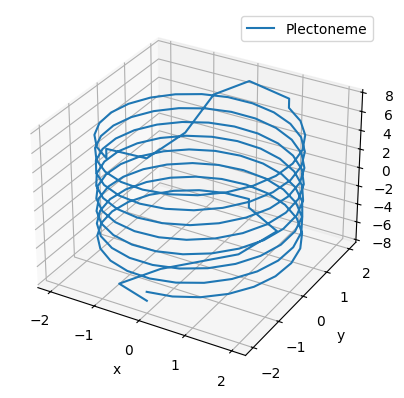

In [5]:
# plectoneme with any radius and pitch, modified version of the following article
# references: 2008 - Neukirch S  Starostin EL - Writhe formulas and antipodal points in plectonemic DNA configurations
# a circularly closed supercoiled helix

# define plectoneme based on the number of monomers



#delta_arclength = 2 * np.arcsin(bond/d_helix) # the arc distance of the projection of turn length in xy-plane (initial_bond is p_helix),
#xy_points = delta_arclength * np.arange(n_points)
#x = (d_helix/2.)*np.cos(xy_points)
#y = (d_helix/2.)*np.sin(xy_points)


n_points = 200
bond = 0.97 # length of the bond between two consecutive monomer
scale_distance = 0.3

plectoneme_clength = n_points * bond
h_radius =  2 # helix radius
h_zgap = bond  #np.sqrt(3)/3 # a positive parameter
h_pitch = 2 * np.pi * h_zgap # pitch of the helix; pitch=2*pi*p
t_super_radius = np.sqrt(h_radius**2 + h_zgap**2)
t_alength = 2 * np.pi * np.sqrt(h_radius**2 + h_zgap**2)# arclength of one turn
h_theta = np.arccos(h_zgap/t_super_radius) # helix angle: 0 <= h_theta < pi/2
h_slope = h_radius/h_zgap # helix slope



mon_per_turn = int(t_alength/bond) # number of monomer per turn
print('mon_per_turn: ', mon_per_turn)
b_clength = h_radius * np.pi
d_clength = b_clength
print('semicricle arclength: ', b_clength)
# points over the two semi-circles:
b_points = int(b_clength/bond) # points over upper semi-circle
d_points = b_points # points over lower semi-circle
print('mon_per_semicircle: ',b_points)

# points on the two helices:
helix_points = n_points - 2*b_points # total points on helices
if (helix_points) % 2:  # odd
    a_points = int(helix_points/2) # number of points to plot
    c_points = a_points + 1 # number of points to plot
else :  # even
    a_points = int(helix_points/2) # number of points to plot
    c_points = a_points # number of points to plot

print('mon_per_helix: ', a_points, c_points)


# helix A: A right-handed helix
a_clength = a_points * bond * scale_distance  # helix contour length
print('helix arclength: ', a_clength)
a_theta = h_theta  # 0 <= h_theta < pi/2
a_delta_psi = a_clength * h_radius / t_super_radius # np.sin(a_theta)
# Create an array of arclengths from 0 to the helix contour length
a_s = np.linspace(0, a_clength, a_points) # arclength
a_psi = a_s * h_radius / t_super_radius #np.sin(a_theta)
# Calculate the x, y, and z coordinates of the helix A:
a_x = h_radius * np.sin(a_psi)
a_y = h_radius * -1 * np.cos(a_psi)
#a_z = a_s*np.cos(a_theta)
a_z = a_s*np.cos(a_theta)

# End semi-circle (loop) B
b_s = np.linspace(0, np.pi, b_points) # arclength
b_theta = a_theta - b_s*(1+2*a_theta/np.pi)
# Calculate the x, y, and z coordinates of the end semi-circle (loop) B:
b_x = h_radius * (np.sin(a_delta_psi)*np.cos(b_s) + np.cos(a_delta_psi)*np.sin(a_theta)*np.sin(b_s)*np.cos(b_s))
b_y = h_radius * (-1 * np.cos(a_delta_psi)*np.cos(b_s) + np.sin(a_delta_psi)*np.sin(a_theta)*np.sin(b_s)*np.cos(b_s))
b_z = a_clength * np.cos(a_theta) + (np.sin(a_theta)-np.sin(b_theta))/(1+(2*a_theta)/np.pi)
b_z = b_z + bond

# helix C: A right-handed helix
c_clength = c_points * bond * scale_distance # contour length of helix
c_theta = -1*np.pi-a_theta
# Create an array of arclengths from 0 to the helix contour length
c_s = np.linspace(0, c_clength, c_points) # arclength
c_psi = a_delta_psi - c_s*np.sin(c_theta)
# Calculate the x, y, and z coordinates of the helix A:
c_x = -1 * h_radius * np.sin(c_psi)
c_y = h_radius * np.cos(c_psi)
c_z = a_clength*np.cos(a_theta) + c_s*np.cos(c_theta)

# End semi-circle (loop) C
d_s = np.linspace(0, np.pi, d_points) # arclength
d_theta = -1*np.pi - a_theta + d_s*(1+(2*a_theta)/np.pi)
# Calculate the x, y, and z coordinates of the end semi-circle (loop) D:
d_x = h_radius * np.sin(a_theta)*np.sin(d_s)*np.cos(d_s)
d_y = h_radius * np.cos(d_s) 
d_z = (np.sin(d_theta)-np.sin(a_theta))/(1+(2*a_theta)/np.pi)
d_z = d_z - bond

plectoneme = np.concatenate((np.stack((a_x, a_y, a_z),axis=1),
np.stack((b_x, b_y, b_z),axis=1),
np.stack((c_x, c_y, c_z),axis=1),
np.stack((d_x, d_y, d_z),axis=1)))

center_function = lambda x: x - x.mean()


plectoneme[:,2] = center_function(plectoneme[:,2])

print("bond lengths:", np.linalg.norm(plectoneme[1:]-plectoneme[:-1],axis=1))

# Plot the helix
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot(plectoneme[:,0], plectoneme[:,1], plectoneme[:,2], label='Plectoneme')
#ax.plot(a_x, a_y, a_z, label='a')
##ax.plot(b_x, b_y, b_z, label='b')
#ax.plot(c_x, c_y, c_z, label='c')
#ax.plot(d_x, d_y, d_z, label='d')
ax.legend()
plt.show()

In [6]:
#  helical linear chain

bond_factor = 0.97
d_mon = 1.0
bond = bond_factor * d_mon
n_atoms = n_points
n_bonds = n_atoms
n_angles = n_atoms
number_atom_type = 1
number_bond_type = 1
chain_type = 'ring'
geomtery = 'cylinder'
max_limit = 1
fname = f'helical_{chain_type}-on_{geomtery}-n{n_atoms}dcyl{2*h_radius+2}.data'
helical_linear_atom_types = np.ones(n_atoms,dtype=np.int64) # atom type of small monomer is 1
helical_linear_bond_types = np.ones(n_bonds,dtype=np.int64) # bond type between small monomer is 1
helical_linear_angle_types = np.ones(n_angles,dtype=np.int64)

### FIX lammps_data_writer to have angle style
lammps_data_writer(plectoneme, helical_linear_atom_types, helical_linear_bond_types, n_atoms, n_bonds, number_atom_type, number_bond_type, max_limit, fname, chain_type=chain_type, angle=True)

NameError: name 'lammps_data_writer' is not defined

In [8]:
def helix(
    n: int,
    zmin: float,
    delta: float,
    r: float
) -> np.ndarray:
    """place `n` equally-spaced points on a helix by using the parametric
    defintion of a helix
    
    The helix is of radius `rhelix`.  The lowest point on the helix along the
    z axis is `zmin` and the two consecutive points along the helix has
    distance `delta` along the z axis.

    Parameters
    ----------
    n: int
        Number of points.
    zmin: float
        The minimum z position of the points along z axis (the helical axis).
    delta: float
        The center-to-center distance of beads along the helical curve.
    r: float
        The radius of the helix

    Returns
    -------
    coords: numpy array)
        a numpy array of the coordinates of `npoints` points on a helix.

    Requirements
    ------------
    numpy
    """
    z = np.linspace(zmin, delta, n)
    x = [r * np.cos(n * 2 * (np.pi / natoms)) for n in range(natoms)]
    y = [r * np.sin(n * 2 * (np.pi / natoms)) for n in range(natoms)]
    coords = np.array([x, y, z])  # A matrix of size 3 * n_points
    coords = coords.T  # N_points 3D points on a helix
    return coords

In [9]:
def reverese_helix(r):
    radii = np.linalg.norm(r[:,:2],axis=1)
    rhelix = np.around(np.mean(radii),decimals=12)
    print(rhelix)
    zstep = np.around(np.mean(r[1:,2]-r[:-1,2]),decimals=12)
    print('zstep:',zstep)
    tx = np.arccos(r[:,0]/radii) #  0<tx<pi
    tstepx = np.around(np.mean(np.abs(tx[1:]-tx[:-1])),decimals=12)
    print('tstepx:',tstepx)
    ty = np.arcsin(r[:,1]/radii) + (np.pi/2.) # 0<ty<pi
    tstepy = np.around(np.mean(np.abs(ty[1:]-ty[:-1])),decimals=12)
    print('tstepy:',tstepy)
    tstep = (np.abs(tstepx) + np.abs(tstepy))/2.0
    print('tstep:',tstep)
    chelix = zstep / tstep
    print('chelix',chelix)
    return rhelix, zstep, tstep, chelix

In [10]:
class lammps_data_parser:
    def __init__(self,filename):
        with open(filename, 'r') as f:
            line=f.readline() # comment 
            line=f.readline() # \n

            line=f.readline() # atoms
            words=line.split() # 
            self.natoms = int(words[0])
            
            
            self.atomids = np.zeros((self.natoms,1))
            self.molids = np.zeros((self.natoms,1))
            self.atomtypes = np.zeros((self.natoms,1))
            self.positions = np.zeros((self.natoms,3))
            self.indexes = np.zeros((self.natoms,3))
            #self.masses = np.zeros((self.natoms,1))
        
            self.velocities = np.zeros((self.natoms,3))
        
            line=f.readline() # bonds
            words=line.split() # 
            self.nbonds=int(words[0])
            self.bondids = np.zeros((self.nbonds,1))
            self.bondtypes = np.zeros((self.nbonds,1))
            self.bondatoms = np.zeros((self.nbonds,2))

            line=f.readline() # \n

            line=f.readline() # atom types
            words=line.split() # 
            self.tatoms = int(words[0]) 

            line=f.readline() # bond types
            words=line.split() # 
            self.tbonds = int(words[0]) 

            line=f.readline() # \n

            line=f.readline() # xmin xmax
            self.xmin, self.xmax = map(float, line.split()[:2])
            line=f.readline() # ymin ymax
            self.ymin, self.ymax = map(float, line.split()[:2])
            line=f.readline() # zmin zmax
            self.zmin, self.zmax = map(float, line.split()[:2])
        
            self.xlen=self.xmax-self.xmin
            self.ylen=self.ymax-self.ymin
            self.zlen=self.zmax-self.zmin
            
            line=f.readline() # \n
            line=f.readline() # Atoms
            line=f.readline() # \n
            
            for i in range(self.natoms): #atoms
                line = f.readline() #  atom-id molecule-id atom-type x y z nx ny nz
                words = line.split()
                self.atomids[i,] = int(words[0])
                self.molids[i,] = int(words[1])
                self.atomtypes[i,] = int(words[2])
                self.positions[i,]= float(words[3]), float(words[4]), float(words[5])
                self.indexes[i,] = int(words[6]), int(words[7]), int(words[8])
            
            line=f.readline() # \n
            line=f.readline() # Velocities
            line=f.readline() # \n
            
            for i in range(self.natoms): #velocities
                line = f.readline() #  atom-id molecule-id atom-type x y z nx ny nz
                words = line.split()
                self.velocities[i,]= float(words[1]), float(words[2]), float(words[3])
            
            line=f.readline() # \n
            line=f.readline() # Bonds
            line=f.readline() # \n
            
            for i in range(self.nbonds): #bonds
                line = f.readline() #  atom-id molecule-id atom-type x y z nx ny nz
                words = line.split()
                self.bondids = int(words[0]), 
                self.bondtypes = int(words[1]), 
                self.bondatoms = int(words[2]), int(words[3])

In [11]:
def psaudo_helix(n_points, d_helix, bond):
    """place n_points monomers on a helical-like contour of diameter d_helix where the center-to-center distance between two consecutive monomers is the initial_bond.
    
    Parameters:
    n_points (int): number of  monomers.
    d_helix (flaot): diameter (or size) of the helix
    bond: the center-to-center distance between two monomers on the helical-like.
    
    Requirements:
    Numpy
    
    Returns:
    a n_point * 3 numpy array containing the coordinates of the centers
    
    Export:
    LAMMPS data file with name fname
    """
    # p_helix (helix pitch) = 2 * pi * c_helix (the helix parameter): the minimum distance passible betwen two turns due to the mon size
    # p_helix = initial_bond: length of 1 turn = 2 * pi * sqrt(r_helix**2 + c_helix**2) = sqrt((pi*d_helix)**2 + p_h**2)
    turn_length = np.sqrt((np.pi*d_helix)**2 + bond**2) 
    mon_per_turn = int(turn_length/bond) # number of monomer per turn
    contour_helix = n_points * bond # contour length of the polymer = contour length of helix
    n_turn = int(np.ceil(contour_helix / turn_length)) # number of helix turns
    l_helix = n_turn * bond # length of helix along its long axis
    print('# of monomers in one turn: ',mon_per_turn)
    print('length of helix: ',l_helix)
    # To correctly place points on the helix; the definition of the helix is not followed; z is decoupled from x and y.
    z = np.linspace(0., l_helix, n_points) # an array of evenly-spaced points in z direction.
    if bond > d_helix:
        raise ValueError("bond length {} is larger than diameter of helix {}, this means no monomers can be placed on helix.".format(bond,d_helix))
    delta_arclength = 2 * np.arcsin(bond/d_helix) # the arc distance of the projection of turn length in xy-plane (initial_bond is p_helix),
    xy_points = delta_arclength * np.arange(n_points)
    x = (d_helix/2.)*np.cos(xy_points)
    y = (d_helix/2.)*np.sin(xy_points)
    return np.stack((x, y, z),axis=-1)

In [12]:
def foci_on_cube(helical_subchain, bond, d_helix, small_mons_between_big_pair):
    """constructs a heterogeneous ring polymer (7 big monomers with a 7 subchains of small monomers between them), mimicking transcription foci in an E. coli chromosome under fast growth condition.
    The 7 big monomers are placed on the 7 vortices of a cube, six of the 7 subchains are on the edges of cube, and one subchain is on a diag of the cube.
     
    helical_subchain (numpy 3d array): the postion
    bond (float): the bond between a big monomer and a small one.
    d_helix (float): diameter o the helical subchain.
    small_mons_between_big_pair (int): number of monomers in a subchain.
    """
    
    print("Cuation: Small and big atom (monomer) types are 1 and 2 respectively.")
    print("Cuation: Small-small and small-big bond types are 1 and 2, respecively.")

    l_helix = np.ptp(helical_subchain[:,2]) # helix length based on the center to center distance of monomers
    subchain_translation = np.sqrt(np.max([d_helix/2,bond])**2-np.min([d_helix/2,bond])**2) # the position at which the helical subchain is palce to have the distance between the center of a focus and the first monomer of the subchain equla to bond
    big_mon_loc = np.array([0,0,0]) # postion of the big monomer
    side_1_subchain = helical_subchain + [0,0,subchain_translation] # position of the subchain in (0,0,1) direction to have the bond correctly
    side_1 = np.append([big_mon_loc],side_1_subchain,axis=0) # side=foci+subchain at the vortex of interest
    side_length=side_1[-1,2]-side_1[0,2] # lenght of foci + subchain 

    subchain_atom_type = np.ones(small_mons_between_big_pair,dtype=np.int64) # atom type of small monomer is 1
    size_1_atom_type = np.append([2],subchain_atom_type) # atom type of big monomer is 2
    subchain_bond_type = np.ones(small_mons_between_big_pair-1,dtype=np.int64) # bond type between small monomer is 1
    size_1_bond_type = np.append([2],subchain_bond_type) # bond type between big and small monomers is 2
    
    side_translation = 2*subchain_translation + l_helix
    r90x = R.from_euler('x',[90],degrees=True)
    side_2 = r90x.apply(side_1) + np.array([0,0,side_translation]) # in (0,-1,0) direction at the vortex of interest
    r90y = R.from_euler('y',[90],degrees=True)
    side_3 = r90y.apply(side_1) + np.array([0,-1*side_translation,side_translation]) # in (1,0,0) direction at the vortex of interest
    r270x = R.from_euler('x',[270],degrees=True)
    side_4 = r270x.apply(side_1) + np.array([side_translation,-1*side_translation,side_translation]) # in (0,1,0) direction at the vortex of interest
    side_6 = r270x.apply(side_1) + np.array([side_translation,-1*side_translation,0]) # in (0,1,0) direction at the vortex of interest

    # side 5 is tricky since it is diagonal 
    #diag_length = np.linalg.norm(side_6[0]-side_4[-1]) # approxiamte diag length based on the position of side-4 last monomer and side-6 first one.
    diag_length = np.sqrt(l_helix**2+side_translation**2) # approximate length of diag based on the shape and size of cube
    diag_subchain_z = np.linspace(0., diag_length, small_mons_between_big_pair) # redefine z component of subchain based on the length of diag
    diag_subchain = np.column_stack((helical_subchain[:,:2],diag_subchain_z)) # define an new subchain based on new z.
    side_5_subchain = diag_subchain + [0,0,subchain_translation] # position of the subchain on the diag to have the bond correctly
    side_5_along_z = np.append([big_mon_loc],side_5_subchain,axis=0) # side 5 along (0,0,1) direction
    r135x = R.from_euler('x',[135],degrees=True) 
    side_5 = r135x.apply(side_5_along_z) + np.array([side_translation,0,side_translation]) # size 5 along the diag at the vortex of interest

    r270y = R.from_euler('y',[270],degrees=True)
    side_7 = r270y.apply(side_1) + np.array([side_translation,0,0]) # in (-1,0,0) directionat the vortex of interest
    
    positions = np.concatenate((side_1,side_2,side_3,side_4,side_5,side_6,side_7),axis=0) # the positions of the whole ring polymer
    positions = positions - (np.max(positions,axis=0)+np.min(positions,axis=0))/2 # put the center of geomtery at the origin of the cartesian coordinate center.
    atom_types = np.tile(size_1_atom_type,7) # the types of all monomers
    bond_types = np.concatenate((size_1_bond_type,[2],size_1_bond_type,[2],size_1_bond_type,[2],size_1_bond_type,[2],
                                      size_1_bond_type,[2],size_1_bond_type,[2],size_1_bond_type,[2]),axis=0) # the bonds between all monomers.
    if len(atom_types) != len(bond_types):
        raise ValueError("The nuumber of atoms andthe number of bonds are not equal; the chain is not a ring.")
    return positions, atom_types, bond_types

In [13]:
def lammps_data_writer(positions, atom_types, bond_types, n_atoms, n_bonds, number_atom_type, number_bond_type, max_limit, fname, chain_type='linear', angle=True):
    """
    Cautions:
    There is no need to define the mass types in the data file. Mass types can set in a LAMMPS input file and then written into a LAMMPS
    data file with write_data after a simulation is done.
    
    """
    if (len(positions) != n_atoms) or (len(atom_types) != n_atoms):
        raise ValueError("Found %d coordinates but the n_atoms claims that there "
                              "should be %d coordinates." % (len(positions), n_atoms))
    print("There is no need to define the mass types in the data file.")    
    limits = abs(np.max(positions,axis=0)) + max_limit # ring chain max and min limits in all 3 dimensions
    #limits = abs(np.max(linear,axis=0)) + max(d_mon_large/2,d_helix/2) # linear chain max and min limits in all 3 dimensions
    #fname = 'foci-linear-ns{}dl{}nl{}hfactor{}bfactor{}hphase{:.2f}.data'.format(n_mon_small,d_mon_large,n_mon_large,helix_factor,bond_factor,helix_phase)
    print("Limits of the simulation box in this data file:")
    print('{} {} xlo xhi\n'.format(-1*limits[0],limits[0]))
    print('{} {} ylo yhi\n'.format(-1*limits[1],limits[1]))
    print('{} {} zlo zhi\n'.format(-1*limits[2],limits[2]))
    print('Caution: To use this data file or change it with change_box command, the new limits should be equal or larger to above limits.')
    with open(fname,'w') as f:
        f.write('Lammps data files by amirhsi\n')
        f.write('\n')
        f.write('{} atoms\n'.format(n_atoms))
        f.write('{} bonds\n'.format(n_bonds))
        f.write('\n')
        f.write('{} atom types\n'.format(number_atom_type))
        f.write('{} bond types\n'.format(number_bond_type))
        f.write('\n')
        f.write('{} {} xlo xhi\n'.format(-1*limits[0],limits[0]))
        f.write('{} {} ylo yhi\n'.format(-1*limits[1],limits[1]))
        f.write('{} {} zlo zhi\n'.format(-1*limits[2],limits[2]))
        f.write('\n')
        f.write('Atoms\n\n')
        # atom-id molecule-id atom-type x y z nx ny nz
        [f.write('{} 1 {} {} {} {} 0 0 0\n'.format(i+1,atom_types[i],positions[i,0],positions[i,1],positions[i,2]))
         for i in range(n_atoms)]
        f.write('\n')
        f.write('Velocities\n\n') 
        # atom-id vx vy vz
        [f.write('{} 0.0 0.0 0.0\n'.format(i+1)) for i in range(n_atoms)]
        f.write('\n')
        f.write('Bonds\n\n')
        # atom-id type atom1 atom2
        [f.write('{} {} {} {}\n'.format(i+1,bond_types[i],i+1,i+2)) for  i in range(n_bonds-1)]
        
        if chain_type == 'ring':
            f.write('{} {} {} {}\n'.format(n_bonds,bond_types[n_bonds-1],n_bonds,1))
        else:
            f.write('{} {} {} {}\n'.format(n_bonds,bond_types[n_bonds-1],n_bonds-1,n_bonds))
            
        if angle is True:
            # atom-id type atom1 atom2
            f.write('\n')
            f.write('Angles\n\n')
            [f.write('{} {} {} {} {}\n'.format(i+1,bond_types[i],i+1,i+2, i+3)) for  i in range(n_bonds-2)]

            if chain_type == 'ring':
                f.write('{} {} {} {} {}\n'.format(n_bonds-1,bond_types[n_bonds-2],n_bonds-1,n_bonds,1))
                f.write('{} {} {} {} {}\n'.format(n_bonds,bond_types[n_bonds-1],n_bonds,1,2))
            else:
                f.write('{} {} {} {} {}\n'.format(n_bonds,bond_types[n_bonds-1],n_bonds-1,n_bonds,))

In [14]:
def foci_on_square_linear(helical_subchain, bond, d_helix, small_mons_between_big_pair):
    """
    foci_on_square_linear constructs a heterogeneous linear polymer (7 big monomers with a 6 subchains of small monomers between them), mimicking transcription foci in an E. coli chromosome under fast growth condition.
    3 big monomers are placed on the  vortices of a square while 4 of them are in thr middle of the 4 sides of that square. The 6 subchains are on the edges of the square, eahc of them between two consecutive big monomers.
     
    helical_subchain (numpy 3d array): the postion
    bond (float): the bond between a big monomer and a small one.
    d_helix (float): diameter o the helical subchain.
    small_mons_between_big_pair (int): number of monomers in a subchain.
    """
    
    print("Cuation: Small and big atom (monomer) types are 1 and 2 respectively.")
    print("Cuation: Small-small and small-big bond types are 1 and 2, respecively.")
    print("Caution: This model is good for a slit geomtery.")
    # side 1:
    r180z = R.from_euler('z', [180], degrees=True)
    subchain_1 = r180z.apply(helical_subchain) # along (0,0,1) direction
    subchain_1_atom_type = np.ones(small_mons_between_big_pair,dtype=np.int64) # atom type of small monomer is 1
    subchain_1_bond_type = np.ones(small_mons_between_big_pair-1,dtype=np.int64) # bond type between small monomer is 1
    l_helix = np.ptp(helical_subchain[:,2]) # helix length based on the center to center distance of monomers
    mon_large_1 = subchain_1[-1]+np.array([0,0,bond]) # first large monomers at the end of subchain 1
    half_side_1 = np.append(subchain_1,[mon_large_1],axis=0) # first half of the side= subhelix of length l_helix + a large monomer at z=l_helix+bond 
    half_size_1_atom_type = np.append(subchain_1_atom_type,2) # atom type of big monomer is 2
    half_size_1_bond_type = np.append(subchain_1_bond_type,2) # bond type between big and small monomers is 2
    subchain_1_xy_flip = np.flip(subchain_1[:,:2],axis=0)
    subchain_1_z_translated = subchain_1[:,2] + l_helix + 2*bond
    subchain_2 = np.column_stack((subchain_1_xy_flip,subchain_1_z_translated))
    mon_large_2 = subchain_2[-1]+np.array([0,0,bond])
    half_side_2 = np.append(subchain_2,[mon_large_2],axis=0)
    ## side 1 result: helix-mon_large-helix-mon_large sequence
    side_1 = np.concatenate((half_side_1,half_side_2),axis=0)
    side_1_atom_type = np.concatenate((half_size_1_atom_type,half_size_1_atom_type),axis=0)
    side_1_bond_type = np.concatenate((half_size_1_bond_type,[2],half_size_1_bond_type),axis=0)
    # side 2:
    r90y = R.from_euler('y', [90], degrees=True)
    r180x = R.from_euler('x', [180], degrees=True)
    side_2_r90y = r90y.apply(side_1)
    side_2_r180x = r180x.apply(side_2_r90y)
    side_2 = side_2_r180x + np.array([-1*d_helix/2,0, 2*l_helix + 4*bond + d_helix/2]) # rotated by 180 degrees around axis z from +x to +y (counter-clockwise), and then translated:
    #side 3:
    r180y = R.from_euler('y', [180], degrees=True)
    side_3_r180y = r180y.apply(side_1)
    r180z = R.from_euler('z', [180], degrees=True)
    side_3_r180z = r180z.apply(side_3_r180y)
    side_3 = side_3_r180z + np.array([2*l_helix+4*bond,0,2*l_helix+4*bond])

    r180y = R.from_euler('y', [180], degrees=True)
    side_4_r180y = r180y.apply(side_2)
    side_4 = side_4_r180y + np.array([2*l_helix+4*bond-d_helix,0,2*l_helix+4*bond])
    first_half_side_4= side_4[:len(side_4)//2] # We want only first half side here since we only need 7 big monmomers (biological limit)
    last_half_side_1= side_1[len(side_4)//2-1:] # We want the two big monomers in side 1 for linear chain
    
    positions = np.concatenate((last_half_side_1,side_2,side_3,first_half_side_4),axis=0)
    positions = positions - (np.max(positions,axis=0)+np.min(positions,axis=0))/2 # the center of geometry at the origin of the coordinate system
    atom_types = np.concatenate((side_1_atom_type[50:],side_1_atom_type,side_1_atom_type,half_size_1_atom_type),axis=0)
    bond_types = np.concatenate((side_1_bond_type[50:],[2],side_1_bond_type,[2],side_1_bond_type,[2],half_size_1_bond_type),axis=0)
    
    return positions, atom_types, bond_types

In [15]:
#  helical linear chain

# choose dcyl smaller than the actual dcyl you use in your lammps script and change_box
# To have center to center distance smaller then sigma_ij, we need to change 0.97 to something smaller -- 
# the choice of PizzaPy does not work for our helical conformation)
# I then change the prefactor from 0.97 to 0.95 (I run many simulations with the prefactor 0.95 
# and get the error FENE bond too large, the reason is probably that crowders does not allow the chain reach 
# its equilibrium size during the equilibration
# the initial bond length or the center to center distance between two monomers on the helix.
# we do not the below one; since even with the help of that the monomers stil do not penetrate each other. To have center
# to center distance smaller then sigma_ij, we need to change 0.97 to something smaller -- the choice of PizzaPy does not work here.

bond_factor = 0.95
d_mon = 1.0
bond = bond_factor * d_mon
d_cyl = 8
helix_factor = 0.7
d_helix = helix_factor * d_cyl
n_atoms = 500
n_bonds = n_atoms - 1
number_atom_type = 2
number_bond_type = 1
max_limit = 0.3*d_cyl/2.0
chain_type = 'linear'
geomtery = 'cylinder'
fname = 'helical_{}-on_{}-n{}dcyl{}hfactor{}bfactor{}.data'.format(chain_type,geomtery,n_atoms,d_cyl,helix_factor,bond_factor)
helical_linear_positions = psaudo_helix(n_atoms, d_helix, bond)
helical_linear_positions = helical_linear_positions - (np.max(helical_linear_positions,axis=0)+np.min(helical_linear_positions,axis=0))/2 # the center of geometry at the origin of the coordinate system
helical_linear_atom_types = np.ones(n_atoms,dtype=np.int64) # atom type of small monomer is 1
helical_linear_bond_types = np.ones(n_bonds,dtype=np.int64) # bond type between small monomer is 1
lammps_data_writer(helical_linear_positions, helical_linear_atom_types, helical_linear_bond_types, n_atoms, n_bonds, number_atom_type, number_bond_type, max_limit, fname, chain_type=chain_type)

# of monomers in one turn:  18
length of helix:  25.65
There is no need to define the mass types in the data file.
Limits of the simulation box in this data file:
-3.9997731761956086 3.9997731761956086 xlo xhi

-3.9998695639017026 3.9998695639017026 ylo yhi

-14.024999999999999 14.024999999999999 zlo zhi

Caution: To use this data file or change it with change_box command, the new limits should be equal or larger to above limits.


IndexError: Replacement index 4 out of range for positional args tuple

In [16]:
def initialize_helical_chain(d_mon, box_size, bond_factor, helix_factor):
    """
    initialize_helical_chain 
    """

In [17]:
# configurations for a hetrogenesous linear chain in on square in a crowded medium
bond_factor = 0.95
d_mon = 1.0
d_mon_big = 5.0
small_big_bond = bond_factor * (d_mon_big + d_mon) / 2.0
small_small_bond = bond_factor * d_mon
helix_factor = 0.8
d_helix = helix_factor * d_mon_big
small_mons_between_big_pair = 50
n_mon_big = 7
n_mon_small = (n_mon_big-1) * small_mons_between_big_pair
n_atoms = n_mon_big + n_mon_small
n_bonds = n_atoms - 1
chain_type = 'linear'
geomtery = 'square'
fname = 'hetero_{}-on_{}-ns{}dl{}nl{}hfactor{}bfactor{}.data'.format(chain_type,geomtery,n_mon_small,d_mon_big,n_mon_big,helix_factor,bond_factor)
max_limit = max(d_mon_big/2,d_helix/2)
number_atom_type = 3
number_bond_type = 2
linear_subchain = psaudo_helix(small_mons_between_big_pair, d_helix, small_small_bond)
linear_positions, linear_atom_types, linear_bond_types = foci_on_square_linear(linear_subchain, small_big_bond, d_helix, small_mons_between_big_pair)
lammps_data_writer(linear_positions, linear_atom_types, linear_bond_types, n_atoms, n_bonds, number_atom_type, number_bond_type, max_limit, fname, chain_type=chain_type)

# of monomers in one turn:  13
length of helix:  3.8
Cuation: Small and big atom (monomer) types are 1 and 2 respectively.
Cuation: Small-small and small-big bond types are 1 and 2, respecively.
Caution: This model is good for a slit geomtery.
There is no need to define the mass types in the data file.
Limits of the simulation box in this data file:
-13.997574708534716 13.997574708534716 xlo xhi

-4.499810147501813 4.499810147501813 ylo yhi

-15.995149417069431 15.995149417069431 zlo zhi

Caution: To use this data file or change it with change_box command, the new limits should be equal or larger to above limits.


IndexError: Replacement index 4 out of range for positional args tuple

In [18]:
# configuration for a heterogensous ring chain on a cube in a crowded medium
bond_factor = 0.95
d_mon = 1.0
d_mon_big = 5.0
small_big_bond = bond_factor * (d_mon_big + d_mon) / 2.0
small_small_bond = bond_factor * d_mon
helix_factor = 0.8
d_helix = helix_factor * d_mon_big
small_mons_between_big_pair = 50
n_mon_big = 7
n_mon_small = n_mon_big * small_mons_between_big_pair
n_bonds = n_atoms = n_mon_big + n_mon_small
chain_type = 'ring'
geomtery = 'cube'
fname = 'hetero_{}-on_{}-ns{}dl{}nl{}hfactor{}bfactor{}.data'.format(chain_type,geomtery,n_mon_small,d_mon_big,n_mon_big,helix_factor,bond_factor)
max_limit = max(d_mon_big/2,d_helix/2)
number_atom_type = 3
number_bond_type = 2
ring_subchain = psaudo_helix(small_mons_between_big_pair, d_helix, small_small_bond)
ring_positions, ring_atom_types, ring_bond_types = foci_on_cube(ring_subchain, small_big_bond, d_helix, small_mons_between_big_pair)
lammps_data_writer(ring_positions, ring_atom_types, ring_bond_types, n_atoms, n_bonds, number_atom_type, number_bond_type, max_limit, fname, chain_type=chain_type)

# of monomers in one turn:  13
length of helix:  3.8
Cuation: Small and big atom (monomer) types are 1 and 2 respectively.
Cuation: Small-small and small-big bond types are 1 and 2, respecively.
There is no need to define the mass types in the data file.
Limits of the simulation box in this data file:
-8.42796875895941 8.42796875895941 xlo xhi

-8.421593457408784 8.421593457408784 ylo yhi

-8.427873832710317 8.427873832710317 zlo zhi

Caution: To use this data file or change it with change_box command, the new limits should be equal or larger to above limits.


In [19]:
np.sqrt(4.75**2 + 8.26**2)

9.528383913340184

In [20]:
# method 3: ring chain in a cylinder
bond_factor = 0.95
helix_factor = 0.8
mon_small_per_big_pair = 100
helix_phase = np.pi/2
d_mon = 1.0
d_mon_large = 5.0
d_cyl = d_mon_large
d_helix = helix_factor * d_mon_large
bond = bond_factor * (d_mon_large + d_mon) / 2.0 # a bond between a pair of large and small monomers
subchain = helical_subchain(mon_small_per_big_pair,d_mon_large,helix_factor=helix_factor, bond_factor=bond_factor)
l_helix = np.abs(subchain[-1,2]-subchain[-0,2]) # assuming the z values are increasing.
subchain_atom_type = np.ones(mon_small_per_big_pair,dtype=np.int64) # atom type of small monomer is 1
subchain_bond_type = np.ones(mon_small_per_big_pair-1,dtype=np.int64) # bond type between small monomer is 1
big_mon_1 = np.array([0,0,0])
translation_step = np.sqrt(np.max([d_helix/2,bond])**2-np.min([d_helix/2,bond])**2)
side_1_first = [0,0,translation_step]
side_1_subchain = subchain + side_1_first
side_1 = np.append([big_mon_1],side_1_subchain,axis=0)
side_length=side_1[-1,2]-side_1[0,2]
size_1_atom_type = np.append([2],subchain_atom_type) # atom type of big monomer is 2
size_1_bond_type = np.append([2],subchain_bond_type) # bond type between big and small monomers is 2

NameError: name 'helical_subchain' is not defined

In [21]:
r90x = R.from_euler('x',[90],degrees=True)
side_2 = r90x.apply(side_1) + np.array([0,0,2*translation_step + l_helix])
r90y = R.from_euler('y',[90],degrees=True)
side_3 = r90y.apply(side_1) + np.array([0,-1*(2*translation_step + l_helix),2*translation_step + l_helix])
r270x = R.from_euler('x',[270],degrees=True)
side_4 = r270x.apply(side_1) + np.array([2*translation_step + l_helix,-1*(2*translation_step + l_helix),2*translation_step + l_helix])
r270x = R.from_euler('x',[270],degrees=True)
side_6 = r270x.apply(side_1) + np.array([2*translation_step + l_helix,-1*(2*translation_step + l_helix),0])

# side 5 is tricky since it is diagonal 
side_5_length = np.linalg.norm(side_6[-1]-side_4[-1]) 
r135x = R.from_euler('x',[135],degrees=True)
subchain_5_z_along_diag = np.linspace(0., side_5_length, mon_small_per_big_pair)
subchain_5_along_diag = np.column_stack((subchain[:,:2],subchain_5_z_along_diag))
subchain_5_along_diag_translated = subchain_5_along_diag + side_1_first
side_5_along_z = np.append([big_mon_1],subchain_5_along_diag_translated,axis=0)
side_5 = r135x.apply(side_5_along_z) + np.array([2*translation_step + l_helix,0,2*translation_step + l_helix])

r270y = R.from_euler('y',[270],degrees=True)
side_7 = r270y.apply(side_1) + np.array([2*translation_step + l_helix,0,0])
ring = np.concatenate((side_1,side_2,side_3,side_4,side_5,side_6,side_7),axis=0)
ring_atom_type = np.tile(size_1_atom_type,7) # atom type of big monomer is 2
ring_bond_type = np.concatenate((size_1_bond_type,[2],size_1_bond_type,[2],size_1_bond_type,[2],size_1_bond_type,[2],
                                  size_1_bond_type,[2],size_1_bond_type,[2],size_1_bond_type,[2]),axis=0) # bond type between big and small monomers is 2
ring = ring - (np.max(ring,axis=0)+np.min(ring,axis=0))/2

NameError: name 'side_1' is not defined

NameError: name 'test' is not defined

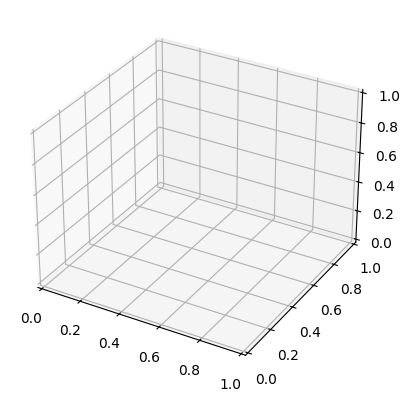

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
nshow = 1000
#data = chain50test.positions
#ax.scatter(data[:nshow,0],data[:nshow,1],data[:nshow,2])
#ax.scatter3D(side_3[:,0],side_3[:,1],side_3[:,2],c='green')
#ax.scatter3D(side_2[:,0],side_2[:,1],side_2[:,2],c='blue')
#ax.scatter3D(side_1[:,0],side_1[:,1],side_1[:,2],c='orange')
#ax.scatter3D(side_4[:,0],side_4[:,1],side_4[:,2],c='red')
#ax.scatter3D(last_half_side_1[:,0],last_half_side_1[:,1],last_half_side_1[:,2],c='orange')
ax.scatter3D(test[:,0],test[:,1],test[:,2],c='red')
#ax.scatter3D(ring[:,0],ring[:,1],ring[:,2],c='red')
#ax.scatter3D(linear_chain[:,0],linear_chain[:,1],linear_chain[:,2],c='red')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [23]:
chain2000 = lammps_data('data.chain.2000')
chain80 = lammps_data('data.chain.80')
chain80test = lammps_data('data.chain.80.test')
chain150 = lammps_data('data.chain.150')
chain150test = lammps_data('data.chain.150.test')

NameError: name 'lammps_data' is not defined

In [24]:
chain1000 = lammps_data('chain.1000.data')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
nshow = 1000
#data = chain50test.positions
datatest = chain1000.positions
#ax.scatter(data[:nshow,0],data[:nshow,1],data[:nshow,2])
ax.scatter(datatest[:nshow,0],datatest[:nshow,1],datatest[:nshow,2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

NameError: name 'lammps_data' is not defined

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

nshow = 2000
ax.scatter(chain2000.positions[:nshow,0],chain2000.positions[:nshow,1],chain2000.positions[:nshow,2])
#ax.scatter(points50[:11,0],points50[:11,1],points50[:11,2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)#, projection='3d')
nshow = 12
data = chain80.positions
datatest = chain80test.positions
ax.scatter(data[:nshow,0],data[:nshow,1])
ax.scatter(datatest[:nshow,0],datatest[:nshow,1],c='red')
ax.set_xlabel('X')
ax.set_ylabel('Y')
#ax.set_zlabel('Z')

plt.show()

In [ ]:
# a scatter class to show real size markers in scatter graph
class scatter():
    ## area of each marker based on the monomer size
    # based on: 
    # https://stackoverflow.com/questions/48172928/scale-matplotlib-pyplot-axes-scatter-markersize-by-x-scale
    def __init__(self,x,y,ax,markersize,**kwargs):
        self.n = len(x)
        self.ax = ax
        self.ax.figure.canvas.draw()
        self.size_data= markersize
        self.size = markersize
        self.sc = ax.scatter(x,y,s=self.size,**kwargs)
        self._resize()
        self.cid = ax.figure.canvas.mpl_connect('draw_event', self._resize)

    def _resize(self,event=None):
        # "The reason why there is 72 points per inch? To answer the question why 72 is the correct number:" 
        # "The linewidth is given in points. The points unit is commonly 72 points/inch, also in matplotlib." 
        # "While the dots per inch may change, points per inch stay constant." See: 
        # https://stackoverflow.com/questions/19394505/matplotlib-expand-the-line-with-specified-width-in-data-unit
        ppd=72./self.ax.figure.dpi
        trans = self.ax.transData.transform
        s =  ((trans((1,self.size_data))-trans((0,0)))*ppd)[1]
        if s != self.size:
            self.sc.set_sizes(s**2*np.ones(self.n))
            self.size = s
            self._redraw_later()

    def _redraw_later(self):
        self.timer = self.ax.figure.canvas.new_timer(interval=10)
        self.timer.single_shot = True
        self.timer.add_callback(lambda : self.ax.figure.canvas.draw_idle())
        self.timer.start()

In [ ]:
#fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 14))#,constrained_layout=True)
fig, ax = plt.subplots(figsize=(14, 14))#,constrained_layout=True)
nshow = 20
# Fixing random state for reproducibility
colormap = plt.get_cmap('viridis')
colors = plt.cm.viridis(np.arange(0,1,len(chain50test.positions[:nshow,2])))
colors = plt.cm.viridis(np.random.rand(len(chain50test.positions[:nshow,2])))
dmon =1.0
# the scatter plot:
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True)
ax.set_xlim(chain50test.xmin-dmon, chain50test.xmax+dmon)
ax.set_ylim(chain50test.ymin-dmon, chain50test.ymax+dmon)
#data = chain80.positions
datatest = chain50test.positions

#sc = scatter(data[:nshow,0],data[:nshow,1], ax, dmon, 
 #            alpha=0.7,facecolors='none',edgecolors='red')#,c=chain2000.positions[:nshow,2],cmap=colormap)
sc = scatter(datatest[:nshow,0],datatest[:nshow,1], ax, dmon, 
             alpha=0.7,facecolors='none',edgecolors='blue')#,c=chain2000.positions[:nshow,2],cmap=colormap)
#plt.colorbar(sc)
cylinder = plt.Circle((0, 0), dcyl/2., color='gray',alpha=0.1)
ax.add_artist(cylinder)
ax.set_aspect(1)
plt.show()